# Case 3. Patient Drug Review	17.3.2019
##### Cognitive Systems for Health Technology Applications, Spring 2019
##### Helsinki Metropolia University of Applied Sciences

##### Pärnänen Simo, opiskelijanumero 	1606318
##### Sallinen Pasi, opiskelijanumero 	1804767

## The background and data preprocessing

The Case 3 Patient Drug Review is the pair work to process text data with neural networks. (A).  We use recurrent and convolutional networks and try to “predict ratings associated to the text” (A). Our data source is the data collection from Drugs.com that has patient drug reviews.

The key question is: “Can you predict the rating of the drug based on the review?” (A). It is called regression problem or if our models prediction is close to originals one? The key in regression analysis is whether one or many factors has some relation to key variable(s).(B). To solve the problem we can choose whether to use 3 or five categories:
negative, neutral, positive highly negative, negative, neutral, positive, highly positive (A) We use five categories. It would be advisable to assign certain weights for different categories, because very high and very low ratings are quite overrepresented in the dataset.

The KUC Hackathon Winter 2018 dataset is required for the solution that is already split to training and test sets. Pandas is used for reading and exploring the data. (A).

There are 885 unique medical conditions specified in the dataset. The train set is 75 percent of the whole dataset, the test set is 25 percent.

## The Model

We first import: numpy, matplotlib.pyplot, pandas, os, shutil, time and normalize from sklearn.preprocessing. We import also from Keras layers (Embedding, Conv1D, Flatten GRU, Dense, LSTM), models, optimizers, regularizers, preprocessing.text (Tokenizer), preprocessing.sequence (pad_sequences) and utils (to_categorical).

Then we define training network with time tracking and compile the data to modify it for better fitting for the network.
The test network with time tracking is defined with settings below.
We import the dataset that is extracted from Drugs.com and downloaded from www.kaggle.com with pandas.
Then we check how how many unique medical conditions there are.
Then we use padding for fitting the output and input.


There are 885 unique conditions



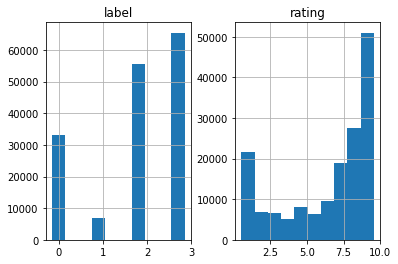

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, shutil
import time
from keras.layers import Embedding, Conv1D, Flatten, GRU, Dense, LSTM
from keras import models
from keras import optimizers
from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import normalize
from sklearn.utils import class_weight

#def trainnetwork(model, x_train, weights, stepsperepoch, validstepsperepoch, epochs):
#	print('\nStructure of the layers\n')
#	model.summary()
#	time_start=time.time()
#	model=model.fit(x_train, steps_per_epoch=stepsperepoch, epochs=epochs, #verbose=1, validation_data=validdata, #validation_steps=validstepsperepoch, #class_weight=weights, initial_epoch=0)

#	plt.plot(model.history['acc'])
#	plt.plot(model.history['val_acc'])
#	plt.title('Model accuracy')
#	plt.ylabel('Accuracy')
#	plt.xlabel('Epoch')
#	plt.legend(['Train', 'Test'], loc='upper left')
#	plt.show()

#	time_end=time.time()
#	print('Time taken: {:.2f} seconds'.format(time_end - time_start))

data=pd.read_csv('drugsComTrain_raw.csv', sep=',')
validdata=pd.read_csv('drugsComTest_raw.csv', sep=',')
df=pd.DataFrame(data)
dfvalid=pd.DataFrame(validdata)

#HOW MANY UNIQUE MEDICAL CONDITIONS THERE ARE?
print('\nThere are '+str(df["condition"].unique().size)+' unique conditions\n')

#RATINGS TO LABELS

labels=[]
r = df['rating']
for rating in r:
    if r[rating] <= 4:
        if r[rating] > 2:
            labels.append(0)
        if r[rating] <= 2:
            labels.append(0)
    if r[rating] == 5 or r[rating] == 6:
        labels.append(1)
    if r[rating] >= 7:
        if r[rating] < 9:
            labels.append(2)
        else:
            labels.append(3)
# ADD THE LABEL COLUMN TO DATA
labels=pd.Series(labels)
df['label'] = labels

#HISTOGRAM OF LABELS
df.hist(column=['rating','label'], bins=10, align='left');

#REVIEWS TO PADDED SEQUENCES
samples=df["review"].iloc[:1000]
tokenizer=Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences=tokenizer.texts_to_sequences(samples)
x_train=pad_sequences(sequences, maxlen = 400)

## The Model (continue)
Then labels are taken to one-hot categories.
Then embedding is used to get words into geometrical space and flatten gets tensors to 2D. (C, 187).
We give the weights given below and the model with the values given.

In [5]:
#LABELS TO ONE-HOT CATEGORIES
one_hot_labels=to_categorical(labels[:1000], num_classes=4)

#WEIGHTS
weights=class_weight.compute_class_weight('balanced',np.unique(one_hot_labels),np.asarray(one_hot_labels))

#model = keras.models.Sequential()
#model.add(layers.Embedding(10000, 128,
#                       	input_length=1000,
#                       	name='embed'))
#model.add(layers.Conv1D(32, 5, activation='relu'))
#model.add(layers.MaxPooling1D(5))
#model.add(layers.Conv1D(32, 5, activation='relu'))
#model.add(layers.GlobalMaxPooling1D())
#model.add(layers.Dense(1))
#model.compile(optimizer='rmsprop',
#          	loss='categorical_crossentropy',
#          	metrics=['acc'])

#Trainnetwork(model, x_train, weights, stepsperepoch, validstepsperepoch, epoch)

TypeError: unhashable type: 'numpy.ndarray'

## The Results
We were not able to finish the network completely and the results focus on the picture shown here demonstrating our problem with labeling all the ratings. We used five categories defined at the Case instructions (A) aka labels on the picture: 0 highly negative, 1 negative, 2 neutral, 3 positive, 4 highly positive. Rating on the 1-10 scale is the same what is used at source document Gräßer et al.(D, 122). 1 is the most negative and 10 is the most positive "overall rating" of the drug. However, the labels did not set properly for the ratings 3 and 4. The rest of the ratings received proper labels though. However, calculating weights was impossible because no instances for one of the specified labels existed. We attempted to circumvent this by only assigning four labels (0-3) for the ratings 1-2 and 5-10, but this too produced an error complaining that the numpy.ndarray type was unhashable. We were unable to proceed beyond this point.
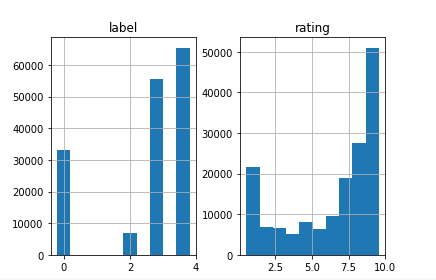
<i>Missing label with the first attempt</i>
## The Conclusions
We couldn't do any test runs, so little conclusions can be drawn. Assigning weights manually through a dictionary or forgetting about adding weights altogether could have sped the team's working pace.

## Reference
(A) Instructions for Case3 at course Cognitive Systems for Health Technology Applications TX00DG16-3002 (2019), Assignment - Case 3.pdf, course Cognitive Systems for Health Technology Applications TX00DG16-3002 at Metropolia University of Applied Science, https://oma.metropolia.fi. Ref. 13.3.2019.

(B) KvantiMOTV, 2008, Regressioanalyysi, https://www.fsd.uta.fi/menetelmaopetus/regressio/analyysi.html. Ref. 13.3.2019

(C) Chollet, Francois (2017, Version 6) Deep Learning with Python. Manning Publications.

(D) Gräßer et al. (2018) Aspect-Based Sentiment Analysis of Drug Reviews Applying
Cross-Domain and Cross-Data Learning. Institut für Biomedizinische Technik, Technische Universität Dresden.
